In [1]:

# Importing libraries
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import os
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
#!pip install tensorflow==2.1.0
#!pip install keras==2.3.1
%matplotlib inline
from keras.layers import  Dense
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import time
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import warnings
from tensorflow.keras.applications import ResNet50
warnings.filterwarnings("ignore")
#pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')



In [2]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile

def path_extractor(zipPATH,zip_file,trgt_dir):
  # Extracting content, if "trgt_dir" not present
  if 'Grad-CAM heatmaps' not in os.listdir('.'):
    with zipfile.ZipFile(zipPATH+zip_file,"r") as z:
            print(f"Extracting content from {zip_file} ......")
            z.extractall()
            print(f"Extracted to {os.getcwd()}")
  # Storing paths of images in "trgt_dir" to a list
  paths = [] # Stores Image file paths
  cls_labels = [] # Stores Class labels
  print(f"Reading image paths in Skin cancer ISIC The International Skin Imaging Collaboration/{trgt_dir} directory")
  folder = "."+os.path.sep+'data'+os.path.sep+trgt_dir
  print(f'Available classes {os.listdir(folder)}')
  for root, dirs, files in os.walk(folder):
      for file in files:
        if file.endswith(".jpg"):
          f_path = os.path.join(root, file)
          label = f_path.split('/')[-2]
          cls_labels.append(label)
          paths.append(f_path)
  print("DONE")
  return paths,cls_labels

In [4]:
# Location of zipfile containing dataset
PATH = "/content/drive/MyDrive/"
zip_file = "skin_cancer_data.zip"

trainImg_paths, y_train = path_extractor(PATH,zip_file,trgt_dir="train")
testImg_paths, y_test = path_extractor(PATH,zip_file,trgt_dir="test")

Extracting content from skin_cancer_data.zip ......
Extracted to /content
Reading image paths in Skin cancer ISIC The International Skin Imaging Collaboration/train directory
Available classes ['benign', 'malignant']
DONE
Extracting content from skin_cancer_data.zip ......
Extracted to /content
Reading image paths in Skin cancer ISIC The International Skin Imaging Collaboration/test directory
Available classes ['benign', 'malignant']
DONE


In [5]:
import cv2

IMAGE_SIZE = (224,224)

def images_extractor(paths):
  '''
  Reading images from provided list and returns pre-processed images.
  '''
  images = []
  for path in paths:
    currImg_BGR = cv2.imread(path)
    b,g,r = cv2.split(currImg_BGR)
    currImg_RGB = cv2.merge([r,g,b])
    currImg = cv2.resize(currImg_RGB,IMAGE_SIZE)
    images.append(currImg)
  return images

In [6]:
X_train = images_extractor(trainImg_paths)
X_train = np.array(X_train)
y_train = np.array(y_train)
print("Shape of train set",X_train.shape)
print("Number of train samples",len(X_train))

Shape of train set (2637, 224, 224, 3)
Number of train samples 2637


In [7]:
X_test = images_extractor(testImg_paths)
X_test = np.array(X_test)
y_test = np.array(y_test)
print("Shape of test set",X_test.shape)
print("Number of test samples",len(X_test))

Shape of test set (660, 224, 224, 3)
Number of test samples 660


In [8]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [9]:
X_train[0]

array([[[217, 131, 140],
        [217, 130, 138],
        [215, 128, 137],
        ...,
        [210, 118, 119],
        [207, 116, 123],
        [211, 122, 126]],

       [[214, 128, 137],
        [217, 131, 140],
        [214, 126, 140],
        ...,
        [208, 113, 117],
        [206, 116, 116],
        [204, 119, 116]],

       [[213, 128, 135],
        [216, 133, 141],
        [220, 131, 137],
        ...,
        [203, 112, 111],
        [202, 113, 107],
        [203, 118, 113]],

       ...,

       [[210, 138, 126],
        [204, 128, 114],
        [200, 127, 110],
        ...,
        [191, 122, 107],
        [189, 122, 106],
        [189, 122, 103]],

       [[205, 135, 125],
        [201, 128, 113],
        [194, 117,  99],
        ...,
        [188, 118, 106],
        [184, 117, 100],
        [186, 120,  98]],

       [[203, 131, 117],
        [203, 125, 112],
        [198, 121, 105],
        ...,
        [188, 118, 106],
        [183, 116,  99],
        [185, 116, 100]]

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

datagen =ImageDataGenerator(horizontal_flip = True,
                   vertical_flip = True,
                   samplewise_center = True,
                   samplewise_std_normalization = True,
                   validation_split = 0.25)

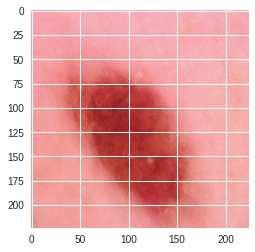

In [ ]:
#original image
image_path="/content/drive/MyDrive/data/train/benign/4.jpg"
img = keras.preprocessing.image.load_img(image_path, target_size= (224,224))
plt.imshow(img)
plt.show()

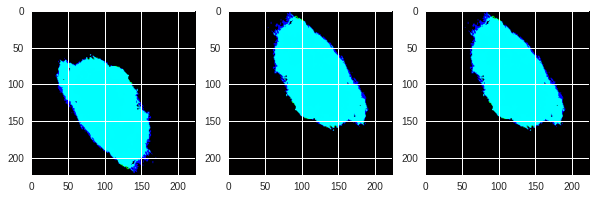

In [ ]:
image_path="/content/drive/MyDrive/data/train/benign/4.jpg"
img = keras.preprocessing.image.load_img(image_path, target_size= (224,224))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,8))
#Plots our figures
for i in range(1,4):
  plt.subplot(1, 3, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [ datagen.flow(X_train, batch_size=1) for i in range(5)]
plotImages(augmented_images)

In [ ]:
import keras
from keras.utils.np_utils import to_categorical 

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

type(y_train)

numpy.ndarray

In [10]:
X_train = X_train/255
X_test = X_test/255


In [11]:
X_train[0]

array([[[0.85098039, 0.51372549, 0.54901961],
        [0.85098039, 0.50980392, 0.54117647],
        [0.84313725, 0.50196078, 0.5372549 ],
        ...,
        [0.82352941, 0.4627451 , 0.46666667],
        [0.81176471, 0.45490196, 0.48235294],
        [0.82745098, 0.47843137, 0.49411765]],

       [[0.83921569, 0.50196078, 0.5372549 ],
        [0.85098039, 0.51372549, 0.54901961],
        [0.83921569, 0.49411765, 0.54901961],
        ...,
        [0.81568627, 0.44313725, 0.45882353],
        [0.80784314, 0.45490196, 0.45490196],
        [0.8       , 0.46666667, 0.45490196]],

       [[0.83529412, 0.50196078, 0.52941176],
        [0.84705882, 0.52156863, 0.55294118],
        [0.8627451 , 0.51372549, 0.5372549 ],
        ...,
        [0.79607843, 0.43921569, 0.43529412],
        [0.79215686, 0.44313725, 0.41960784],
        [0.79607843, 0.4627451 , 0.44313725]],

       ...,

       [[0.82352941, 0.54117647, 0.49411765],
        [0.8       , 0.50196078, 0.44705882],
        [0.78431373, 0

In [ ]:
base_model=ResNet50(input_shape=(224,224,3), include_top=False, 
    weights="imagenet"
)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
tailModel = base_model.output
tailModel = Flatten(name="flatten")(tailModel)
tailModel = Dense(256, activation="relu")(tailModel)
tailModel = Dropout(0.2)(tailModel)
tailModel = Dense(2, activation="sigmoid")(tailModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
resmodel = Model(inputs=base_model.input, outputs=tailModel)

In [ ]:
resmodel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen =ImageDataGenerator(horizontal_flip = True,
                   vertical_flip = True,
                   samplewise_center = True,
                   samplewise_std_normalization = True,
                   validation_split = 0.25)


In [ ]:
resmodel.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=3)
es2 = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3)


In [ ]:
historyres = resmodel.fit(datagen.flow(X_train, y_train),validation_data = datagen.flow(X_test, y_test),callbacks=[es,es2] ,epochs=10)

Epoch 1/10
83/83 [==============================] - 518s 6s/step - loss: 1.8697 - accuracy: 0.7471 - val_loss: 0.4973 - val_accuracy: 0.7727
Epoch 2/10
83/83 [==============================] - 555s 7s/step - loss: 0.4611 - accuracy: 0.7850 - val_loss: 0.4301 - val_accuracy: 0.7939
Epoch 3/10
83/83 [==============================] - 515s 6s/step - loss: 0.4086 - accuracy: 0.8066 - val_loss: 0.4141 - val_accuracy: 0.8000
Epoch 4/10
83/83 [==============================] - 514s 6s/step - loss: 0.4160 - accuracy: 0.7975 - val_loss: 0.3823 - val_accuracy: 0.8167
Epoch 5/10
83/83 [==============================] - 514s 6s/step - loss: 0.3903 - accuracy: 0.8108 - val_loss: 0.3992 - val_accuracy: 0.8288
Epoch 6/10
83/83 [==============================] - 514s 6s/step - loss: 0.3778 - accuracy: 0.8233 - val_loss: 0.4203 - val_accuracy: 0.8167
Epoch 7/10
83/83 [==============================] - 513s 6s/step - loss: 0.3491 - accuracy: 0.8127 - val_loss: 0.3940 - val_accuracy: 0.8121
Epoch 8/10
83

In [ ]:
print("Evaluate on test data")
results = resmodel.evaluate(datagen.flow(X_test, y_test)
)
print("test loss, test acc:", results)

Evaluate on test data
21/21 [==============================] - 102s 5s/step - loss: 0.4575 - accuracy: 0.8076
test loss, test acc: [0.4574729800224304, 0.8075757622718811]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import copy
from sklearn.metrics import confusion_matrix
label_to_class = {
    'bengin': 0,
    'malignant':1,
}
y_preds = resmodel.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
y_trues = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_trues, y_preds)

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)

ax.set(
    xticklabels=list(label_to_class.keys()),
    yticklabels=list(label_to_class.keys()),
    title='confusion matrix',
    ylabel='True label',
    xlabel='Predicted label'
)
params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
plt.show()

In [ ]:

#mobilnet

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,AveragePooling2D
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout 

mobile = tf.keras.applications.mobilenet.MobileNet(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
# we don’t have to train all the layers, we make them non_trainable
for layer in mobile.layers:
    layer.trainable = False
# Flatten the output layer to 1 dimension
x = Flatten()(mobile.output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
x = Dense(250, activation='relu')(x)
x = Dense(125, activation='relu')(x)
# Add a dropout rate of 0.5 or any acceptable values as per your need/complexity
x = Dropout(0.25)(x)
# Add a final sigmoid layer for classification
x = Dense(2,activation='sigmoid')(x) # Use Softmax if class more than 2 classes
modelmobile = tf.keras.models.Model(mobile.input,x)

In [ ]:
modelmobile.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
modelmobile.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
mobilenet_history = modelmobile.fit(datagen.flow(X_train, y_train),validation_data = datagen.flow(X_test, y_test), epochs=10)

Epoch 1/10
83/83 [==============================] - 132s 2s/step - loss: 1.0936 - accuracy: 0.7827 - val_loss: 0.3644 - val_accuracy: 0.8136
Epoch 2/10
83/83 [==============================] - 130s 2s/step - loss: 0.3283 - accuracy: 0.8468 - val_loss: 0.3361 - val_accuracy: 0.8379
Epoch 3/10
83/83 [==============================] - 129s 2s/step - loss: 0.3153 - accuracy: 0.8680 - val_loss: 0.3291 - val_accuracy: 0.8515
Epoch 4/10
83/83 [==============================] - 129s 2s/step - loss: 0.2688 - accuracy: 0.8821 - val_loss: 0.3476 - val_accuracy: 0.8667
Epoch 5/10
83/83 [==============================] - 129s 2s/step - loss: 0.2379 - accuracy: 0.9010 - val_loss: 0.2842 - val_accuracy: 0.8576
Epoch 6/10
83/83 [==============================] - 129s 2s/step - loss: 0.2262 - accuracy: 0.8965 - val_loss: 0.3293 - val_accuracy: 0.8515
Epoch 7/10
83/83 [==============================] - 129s 2s/step - loss: 0.1988 - accuracy: 0.9181 - val_loss: 0.3264 - val_accuracy: 0.8591
Epoch 8/10
83

In [ ]:
modelmobile.save("transfer_learning_mobilenet_model.h5")


In [ ]:
from google.colab import files
files.download("transfer_learning_mobilenet_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Evaluate on test data")
results = modelmobile.evaluate(datagen.flow(X_test, y_test))
print("test loss, test acc:", results)

Evaluate on test data
21/21 [==============================] - 23s 1s/step - loss: 0.4926 - accuracy: 0.8076
test loss, test acc: [0.4925861358642578, 0.8075757622718811]


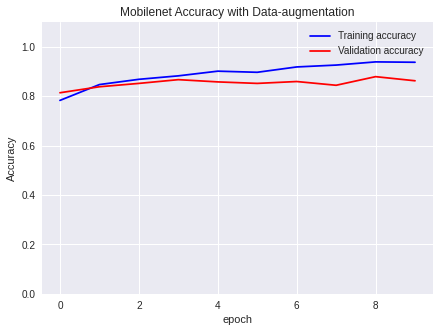

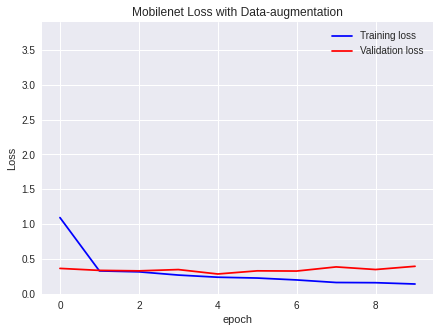

In [ ]:
import matplotlib.pyplot as plt
# Plotting accuracy history
plt.figure(figsize=(7, 5))
#plt.xlim(2, 50)
plt.ylim(0.0, 1.1)
plt.plot(range(10), mobilenet_history.history['accuracy'], color='blue', label='Training accuracy');
plt.plot(range(10), mobilenet_history.history['val_accuracy'], color='r', label='Validation accuracy');
plt.legend();
plt.title('Mobilenet Accuracy with Data-augmentation');
plt.ylabel('Accuracy');
plt.xlabel('epoch');
plt.savefig('Mobilenet_accuracy_without.jpg', dpi=300, bbox_inches='tight');

# Plotting loss history
plt.figure(figsize=(7, 5))
#plt.xlim(2, 50)
plt.ylim(0.0, 3.9)
plt.plot(range(10), mobilenet_history.history['loss'], color='blue', label='Training loss');
plt.plot(range(10), mobilenet_history.history['val_loss'], color='r', label='Validation loss');
plt.legend();
plt.title('Mobilenet Loss with Data-augmentation');
plt.ylabel('Loss');
plt.xlabel('epoch');
plt.savefig('Mobilenet_loss_without.jpg', dpi=300, bbox_inches='tight')

In [ ]:
#second mobilenet

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')


17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in mobile.layers:
    layer.trainable = False

In [ ]:
x = mobile.layers[-6].output
x = Flatten()(x)
x = Dropout(0.20)(x)
predictions = Dense(2, activation='sigmoid')(x)
# Combining pre-trained MobileNet model with pedictions layer to help it to connect input and output layers for out purpose
mob_model2 = Model(inputs=mobile.input, outputs=predictions)

In [ ]:
mob_model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
mob_model2.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])
mobilenet2_history = mob_model2.fit(datagen.flow(X_train, y_train),validation_data = datagen.flow(X_test, y_test), epochs=13)

Epoch 1/13
83/83 [==============================] - 133s 2s/step - loss: 0.7446 - accuracy: 0.9101 - val_loss: 0.7194 - val_accuracy: 0.8667
Epoch 2/13
83/83 [==============================] - 110s 1s/step - loss: 0.4497 - accuracy: 0.9033 - val_loss: 0.8348 - val_accuracy: 0.8621
Epoch 3/13
83/83 [==============================] - 129s 2s/step - loss: 0.5548 - accuracy: 0.8934 - val_loss: 1.1230 - val_accuracy: 0.8152
Epoch 4/13
83/83 [==============================] - 109s 1s/step - loss: 0.4720 - accuracy: 0.8999 - val_loss: 1.3852 - val_accuracy: 0.8152
Epoch 5/13
83/83 [==============================] - 109s 1s/step - loss: 0.4296 - accuracy: 0.9113 - val_loss: 1.0259 - val_accuracy: 0.8394
Epoch 6/13
83/83 [==============================] - 128s 2s/step - loss: 0.4783 - accuracy: 0.9071 - val_loss: 0.8699 - val_accuracy: 0.8606
Epoch 7/13
83/83 [==============================] - 109s 1s/step - loss: 0.7010 - accuracy: 0.8976 - val_loss: 0.8939 - val_accuracy: 0.8576
Epoch 8/13
83

In [ ]:
print("Evaluate on test data")
results = mob_model2.evaluate(datagen.flow(X_test, y_test))
print("test loss, test acc:", results)

Evaluate on test data
21/21 [==============================] - 22s 1s/step - loss: 0.9025 - accuracy: 0.8667
test loss, test acc: [0.9024934768676758, 0.8666666746139526]


In [ ]:
mob_model2.save("transfer_learning_mobilenetupdated_model.h5")
from google.colab import files
files.download("transfer_learning_mobilenetupdated_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

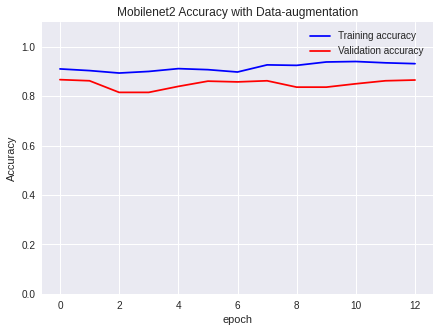

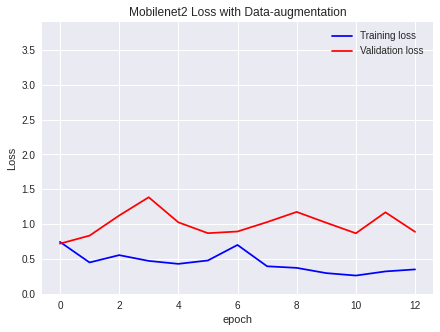

In [ ]:
import matplotlib.pyplot as plt
# Plotting accuracy history
plt.figure(figsize=(7, 5))
#plt.xlim(2, 50)
plt.ylim(0.0, 1.1)
plt.plot(range(13), mobilenet2_history.history['accuracy'], color='blue', label='Training accuracy');
plt.plot(range(13), mobilenet2_history.history['val_accuracy'], color='r', label='Validation accuracy');
plt.legend();
plt.title('Mobilenet2 Accuracy with Data-augmentation');
plt.ylabel('Accuracy');
plt.xlabel('epoch');
plt.savefig('Mobilenet2_accuracy_without.jpg', dpi=300, bbox_inches='tight');

# Plotting loss history
plt.figure(figsize=(7, 5))
#plt.xlim(2, 50)
plt.ylim(0.0, 3.9)
plt.plot(range(13), mobilenet2_history.history['loss'], color='blue', label='Training loss');
plt.plot(range(13), mobilenet2_history.history['val_loss'], color='r', label='Validation loss');
plt.legend();
plt.title('Mobilenet2 Loss with Data-augmentation');
plt.ylabel('Loss');
plt.xlabel('epoch');
plt.savefig('Mobilenet2_loss_without.jpg', dpi=300, bbox_inches='tight')

In [ ]:
import copy
from sklearn.metrics import confusion_matrix
label_to_class = {
    'bengin': 0,
    'malignant':1,
}
y_preds = mob_model2.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
y_trues = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_trues, y_preds)

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)

ax.set(
    xticklabels=list(label_to_class.keys()),
    yticklabels=list(label_to_class.keys()),
    title='confusion matrix',
    ylabel='True label',
    xlabel='Predicted label'
)
params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
plt.show()

In [ ]:
cm = confusion_matrix(y_trues, y_preds)


In [ ]:
print(cm)

[[312  48]
 [ 58 242]]


In [ ]:
######interpretability 1

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet import preprocess_input
from numpy import expand_dims


In [ ]:
image = load_img("/content/drive/MyDrive/data/train/benign/4.jpg" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

In [ ]:
image = preprocess_input(image)


In [ ]:
#learnable features from first conv layer (first feautre map )
model = Model(inputs=mob_model2.inputs , outputs=mob_model2.layers[1].output)

In [ ]:
model.summary()

Model: "model_375"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
Total params: 864
Trainable params: 0
Non-trainable params: 864
_________________________________________________________________


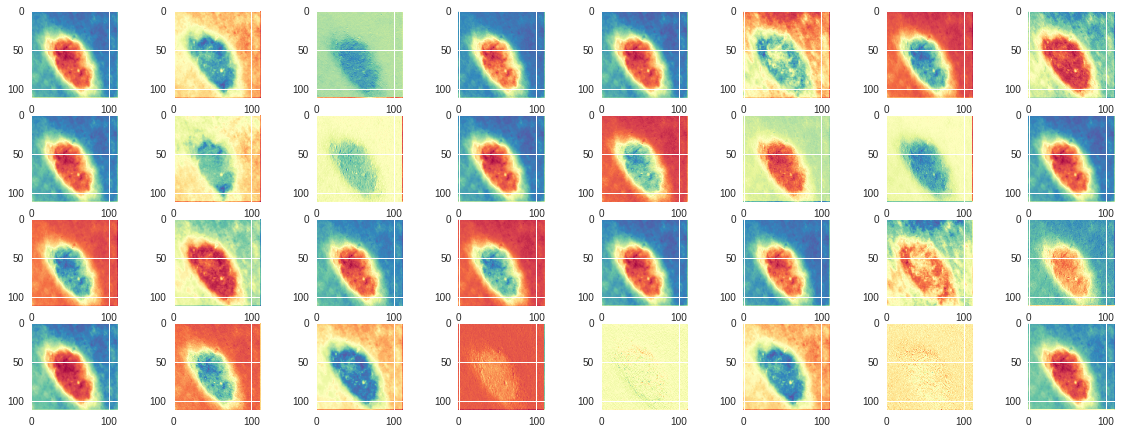

In [ ]:
#calculating features_map(first conv layer)
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='Spectral')
    
pyplot.show()

In [ ]:
#calculating features_map(for 5 conv layer)
blocks = [ 14 ,40,80]
outputs = [mob_model2.layers[i].output for i in blocks]

model2 = Model( inputs= mob_model2.inputs, outputs = outputs)


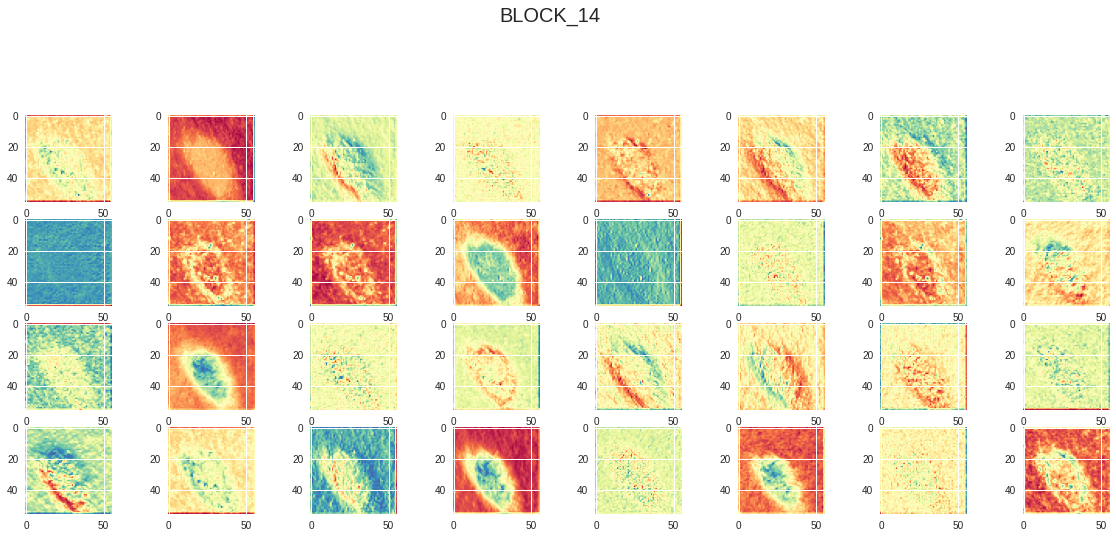

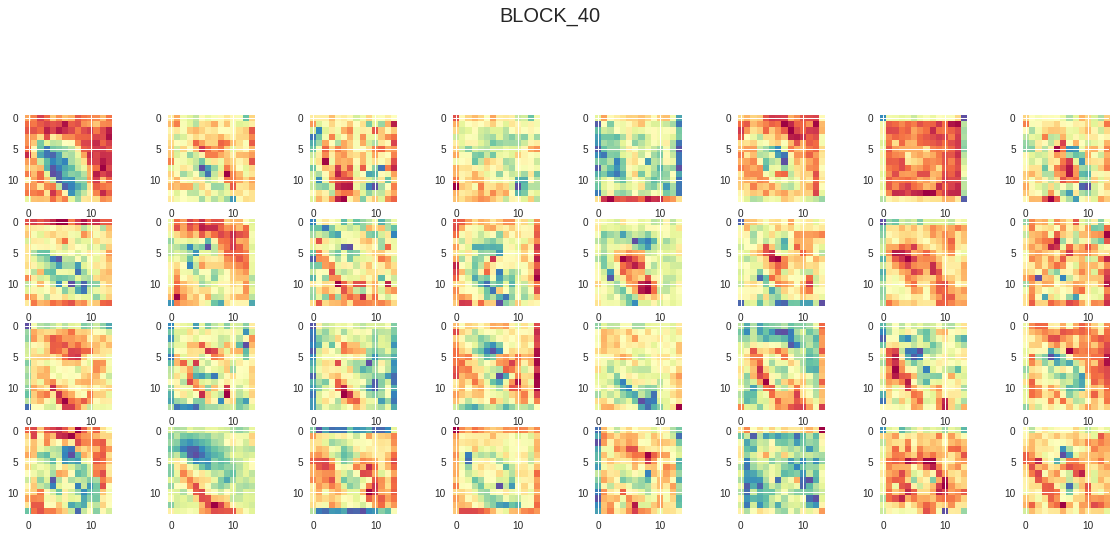

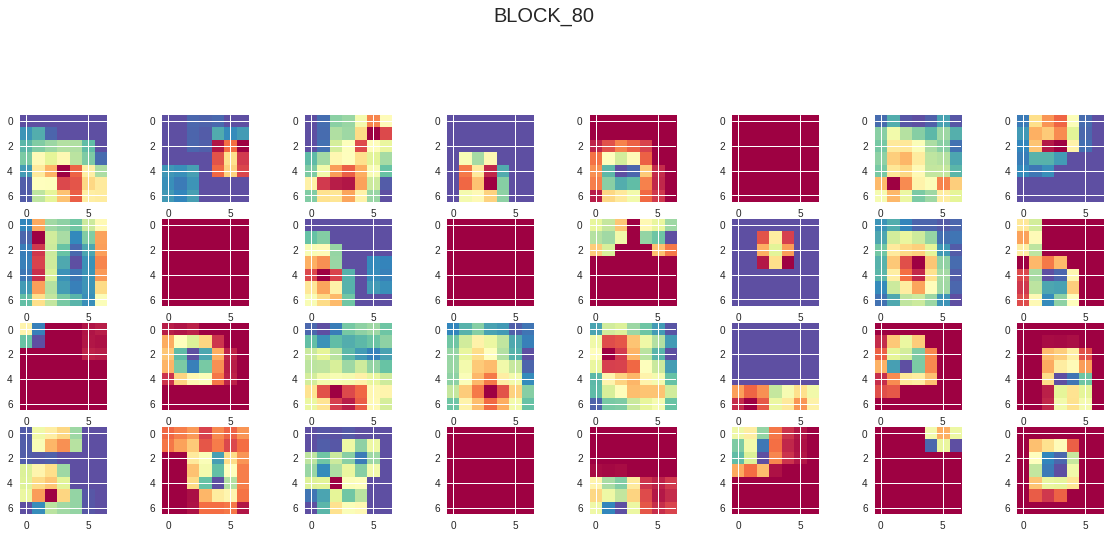

In [ ]:
feature_map = model2.predict(image)

for i,fmap in zip(blocks,feature_map):
    fig = pyplot.figure(figsize=(20,15))
    #https://stackoverflow.com/a/12444777
    fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1] , cmap='Spectral')
    
pyplot.show()

In [ ]:
############ Interpretability of mobilenzt2 model

In [ ]:
mob_model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
a=mob_model2.layers[-3:]

In [ ]:
a

In [ ]:
def get_img_array(img_path, size=IMAGE_SIZE):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 NumPy array
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 180, 180, 3)
    array = np.expand_dims(array, axis=0) / 255.0
    return array

In [ ]:
def make_gradcam_heatmap(img_array, model):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.layers[-4]
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)
    
    # Mark the classifying layers
    classifier_layers = model.layers[-3:]

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for classifier_layer in classifier_layers:
        x = classifier_layer(x)
    classifier_model = keras.Model(classifier_input, x)
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

In [ ]:
import matplotlib.cm as cm

def superimposed_cam(file_path):
    # Prepare image
    img_array = get_img_array(file_path)

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(
        img_array, mob_model2
    )

    # Rescale the original image
    img = img_array * 255

    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("PuBu_r")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img[0])
    
    return superimposed_img, CLASSES[np.argmax(mob_model2.predict(img_array))]


In [ ]:
covid_filenames = tf.io.gfile.glob('/content/drive/MyDrive/data/train/benign/*')
pneumonia_filenames = tf.io.gfile.glob('/content/drive/MyDrive/data/train/malignant/*')

In [ ]:
CLASSES = ['Bengin', 'Malignant']

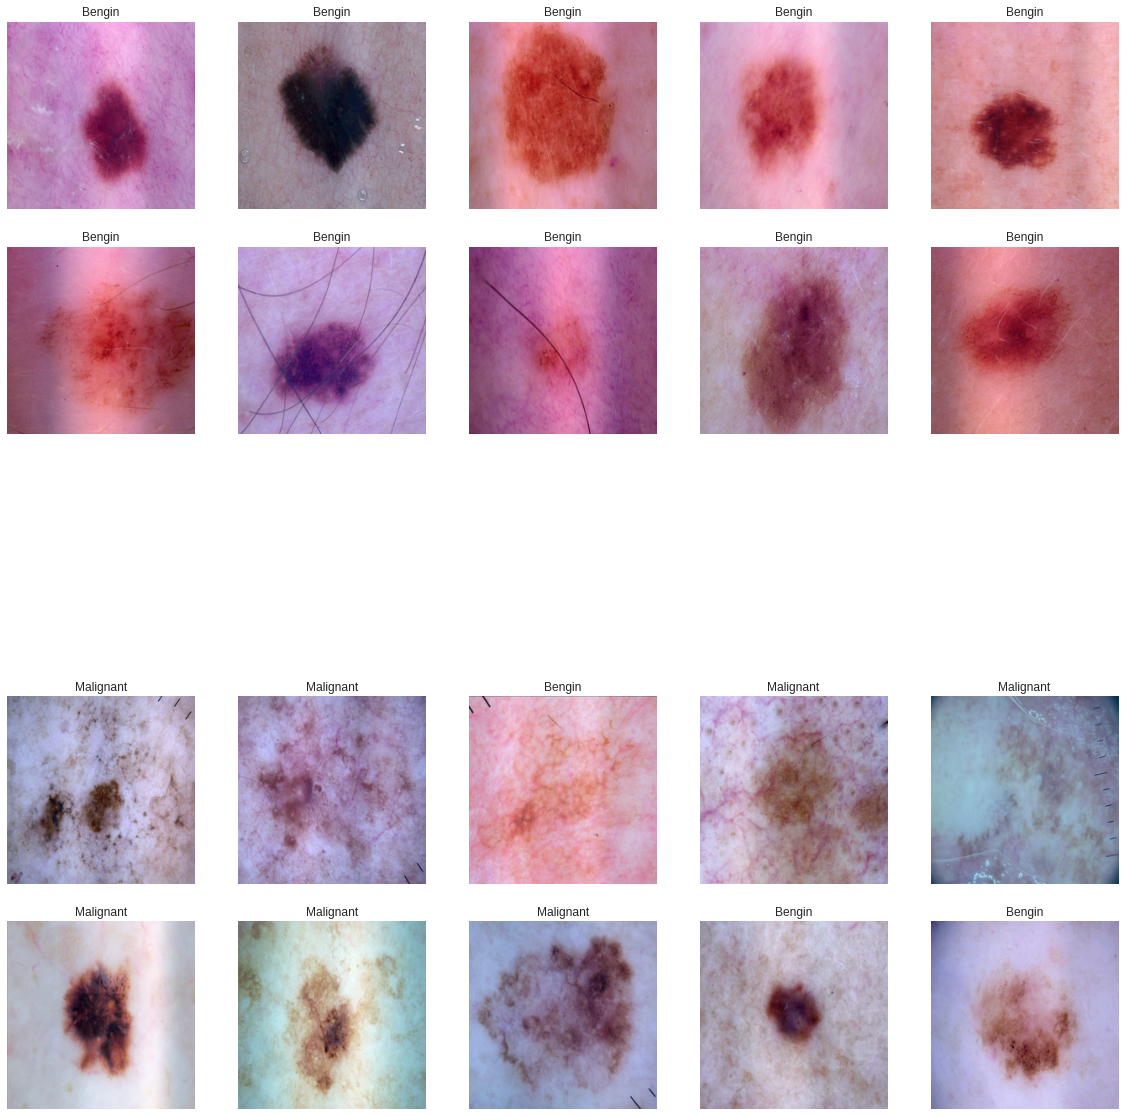

In [ ]:
plt.figure(figsize=(20,20))
for n in range(10):
    ax = plt.subplot(5,5,n+1)
    img, pred = superimposed_cam(covid_filenames[n])
    plt.imshow(img)
    plt.title(pred)
    plt.axis("off")
for n in range(15, 25):
    ax = plt.subplot(5,5,n+1)
    img, pred = superimposed_cam(pneumonia_filenames[n])
    plt.imshow(img)
    plt.title(pred)
    plt.axis("off")